# **Reinforcement learning for decision making of autonomous cars**

The aim of this project is to use Reinforcement Learning for the decision making of autonomous cars. We choose the simple highway environment developed by Edward Leurant as our training environmennt and aim to teach the agent car how to navigate the highway while avoiding collision with other vehicles, increasing its speed, and trying as much as possible to stay on the right lane. In order to do this, we use Deep Q-Learning (or deep Q-networks - DQN)

DQN represents a breakthrough in the field by combining deep neural networks with Q-learning, a traditional reinforcement learning algorithm. This fusion enables the agent to learn directly from raw sensory input, such as pixels in a visual environment, without the need for handcrafted features or explicit domain knowledge. By leveraging the power of deep neural networks, DQN has proven to be capable of solving high-dimensional and visually complex problems, including playing video games, navigating virtual environments, and controlling robotic systems.

The core idea behind DQN is to approximate the optimal action-value function, known as Q-function, using a deep neural network. This function estimates the expected cumulative reward an agent can obtain by taking a particular action in a given state. The DQN architecture consists of multiple layers of neurons that learn to map the agent's observations to corresponding action-values. Through a process of trial and error, the DQN agent explores its environment, collects experiences, and updates its neural network using a combination of reinforcement learning techniques, including Q-learning and experience replay.



# **Highway Environment**


In this section, we create and try to understand our environment. We create a statistical model in order to simplify the problem and be able to understand what is happening behind the training process.

Markov Decision Processes give us a way to model our sequential decision-making process and formalize it in a mathematical way. This formalization is a basis for us to develop our reinforcement learning solution. The reason we can use a Markov model is because each state depends only on the previous one and on the action taken in that previous state. Using this model, we start by defining the agent, the environment, the states, the actions, and the rewards. At each time step, the agent receives a representation of the state it is in and selects an action. Throughout the process, the agent wants to maximize the rewards it gains throughout the state-action sequential decision making.
Applied to our problem:

*   The agent is the car (ego-vehicle)
*   The environment is a highway environment with 4 lanes and 50 vehicles with episode duration 20 seconds.  
*   The states of our model are characterized by 5 x 5 kinematic observation matrices whereby the first row is allocated to the agent and the rest of the rows are for the vehicles that are observed by our agent within the specified [x, y] range. The first column informs us about the presence of a vehicle (0 or 1), the 2nd and 3rd columns inform us about the absolute position of the ego-vehicle and the relative positions of the other vehicles with respect to the agent in the x and y directions. The 4th and 5th columns inform us about the absolute velocity of the ego-vehicle and the relative velocity of the observed ones in the x and y directions.
*   Five actions can be taken in each state:
          -	0: ‘LANE_LEFT’: Move to the left lane
          -	1: ‘IDLE’: Remain in the same lane
          -	2: ‘LANE_RIGHT’: Move to the right lane
          -	3: ‘FASTER’: Increase speed
          -	4: ‘SLOWER’: Decrease speed
*   The reward is defined as fostering driving at high speed, on the rightmost lanes, and to avoid collisions. Therefore, we define the below rewards:
          -	‘Collision_reward’ = -1 in case of collision.
          -	‘High_speed_reward’ = 0.4 at the highest speed and linearly mapped to 0 for lower speeds.
          -	‘Lane_change_reward’ = 0
          -	‘right_lane_reward’ = 0.1 at the right lane and linearly mapped to 0 for leftmost ones.

The final reward value is a sum of the respective rewards for each action taken.

This model allows us to map the reward at time t+1 with respect to the state and action at time t. It assumes that the State S_t+1 and the Reward R_t+1 have defined distributions (that we would need to determine) and that all the values that can be assigned to S_t+1 and R_t+1 have some associated probability. These distributions depend on the preceding state and action that occurred in the previous time step t.


In [ ]:
# Visualization of the environment
import sys
from tqdm.notebook import trange
!pip install moviepy -U
!pip install imageio_ffmpeg
!pip install pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!git clone https://github.com/eleurent/highway-env.git
sys.path.insert(0, './highway-env/scripts/')
!pip install gymnasium
import gymnasium as gym

In [ ]:
# Before running this section, modify "utils.py" inside the newly generated folder
# "highway-env", "scripts", to "video_utils.py" to avoid confusion and errors
from video_utils import record_videos, show_videos

In [ ]:
# Displaying videos on Colab
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:
# Installing the environment
!pip install git+https://github.com/eleurent/rl-agents#egg=rl-agents
!pip install highway-env
import highway_env
import pprint

In [ ]:
# Checking if the environment is imported to the gymnasium library
# If it does not reinitiate the execution environment and then run again as some versions of the
# libraries must have been modified in the previous sections and need reinitialization in order to be used.
print(gym.envs.registry.keys())

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'exit-v0', 'highway-v0', 'highway-fast-v0', 'intersection-v0', 'intersection-v1', 'intersection-multi-agent-v0',

In [ ]:
# Making the highway environment
env = gym.make("highway-v0", render_mode="rgb_array")
env = record_videos(env)
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 50,
 'vehicles_density': 1}


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


Observations

In [ ]:
# Understanding our states
obs, info = env.reset()
print(obs) # as we are only interested in the position and velocity ovservations
print(obs.reshape(1,-1).squeeze())
print(info)

[[ 1.          0.89622116  0.5         0.3125      0.        ]
 [ 1.          0.097408    0.         -0.02815095  0.        ]
 [ 1.          0.19068359  0.         -0.03610747  0.        ]
 [ 1.          0.29920402 -0.5        -0.01504062  0.        ]
 [ 1.          0.3967028  -0.5        -0.01618453  0.        ]]
[ 1.          0.89622116  0.5         0.3125      0.          1.
  0.097408    0.         -0.02815095  0.          1.          0.19068359
  0.         -0.03610747  0.          1.          0.29920402 -0.5
 -0.01504062  0.          1.          0.3967028  -0.5        -0.01618453
  0.        ]
{'speed': 25, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': 0.5, 'on_road_reward': 1.0}}


Available actions:

In [ ]:
ACTIONS_ALL = {
    0: 'LANE_LEFT',
    1: 'IDLE',
    2: 'LANE_RIGHT',
    3: 'FASTER',
    4: 'SLOWER'
}

In [ ]:
print(env.get_available_actions())

[1, 0, 2, 3, 4]


In [ ]:
# Taking one idle step inside the environment returns the following:
action = env.action_type.actions_indexes["IDLE"]
env.step(action)

(array([[ 1.        ,  1.        ,  0.25      ,  0.3125    ,  0.        ],
        [ 1.        ,  0.07645055, -0.11378326, -0.07017262, -0.05489996],
        [ 1.        ,  0.20224755,  0.4926292 , -0.03336951,  0.00347655],
        [ 1.        ,  0.28469273,  0.20285858, -0.08092919,  0.02492662],
        [ 1.        ,  0.39077145,  0.        , -0.04688393,  0.        ]],
       dtype=float32),
 0.8222222222222223,
 False,
 False,
 {'speed': 25.0,
  'crashed': False,
  'action': 1,
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 0.3333333333333333,
   'high_speed_reward': 0.5,
   'on_road_reward': 1.0}})

In [ ]:
# Taking 20 steps:
frames = []
env.reset()
for _ in range(20):
    action = env.action_type.actions_indexes["IDLE"]
    env.render
    env.step(action)

env.close()

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4


In [ ]:
show_video('/content/videos/rl-video-episode-0.mp4')
# We notice how the agent taking purely random actions is not aware of the vehicles around it and end up crashing.

In [ ]:
# We reset environment before working with it in our DQN
env.reset()
print(len(env.get_available_actions()))
# The number of actions is 4 if the vehicle is at the right-most or left-most lanes, 5 if it is in the 2 middle lanes

5


# **Reinforcement Learning using a DQN**

In this section, we implement the DQN and train our agent to make decisions inside the highway environment.

The Deep Q-Learning Algorithm takes care of finding the policies that will allow the agent to get optimal returns if the agent follows these policies. A policy is the probability that an agent will select a specific action given that it is in a specific state. With each policy is associated a quality function Q telling us how good it is for the agent to select any given action at any given state while following policy π.

We implement below the different working components of the DQN and discuss how they work.

In [ ]:
# Importing the necessary libraries
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import csv
import pickle

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


**Replay Memory:**
The Replay Memory is a data structure of finite length that stores the past experiences of the agent in terms of state - action/ next state - reward transitions. It also indicates if the episode was terminated. These stored transitions are randomly sampled later in the learning process. By doing so, the transitions that make up the batch are decorrelated which greatly stabilizes the learning process.   




In [ ]:
class ReplayMemory:
    """
    Class representing the replay buffer used for storing experiences for off-policy learning
    """
    def __init__(self, capacity):
        self.capacity = capacity
        self.state = []
        self.action = []
        self.next_state = []
        self.reward = []
        self.done = []
        self.idx = 0

    def store(self, state, action, next_state, reward, done):

        if len(self.state) < self.capacity:
            self.state.append(state.reshape(1,-1).squeeze())
            self.action.append(action)
            self.next_state.append(next_state.reshape(1,-1).squeeze())
            self.reward.append(reward)
            self.done.append(done)
        else:
            self.state[self.idx] = state.reshape(1,-1).squeeze()
            self.action[self.idx] = action
            self.next_state[self.idx] = next_state.reshape(1,-1).squeeze()
            self.reward[self.idx] = reward
            self.done[self.idx] = done

        self.idx = (self.idx+1)%self.capacity # for circular memory

    def sample(self, batch_size, device):

        indices_to_sample = random.sample(range(len(self.state)), batch_size)

        states = torch.from_numpy(np.array(self.state)[indices_to_sample]).float().to(device)
        actions = torch.from_numpy(np.array(self.action)[indices_to_sample]).to(device)
        next_states = torch.from_numpy(np.array(self.next_state)[indices_to_sample]).float().to(device)
        rewards = torch.from_numpy(np.array(self.reward)[indices_to_sample]).float().to(device)
        dones = torch.from_numpy(np.array(self.done)[indices_to_sample]).to(device)

        return states, actions, next_states, rewards, dones


    def __len__(self):
        return len(self.state)

**Neural Network:**
Because we are dealing with a relatively simple environment in which the states are only represented by 5 by 5 matrices, we implement our deep Q-network using only fully-connected (dense) layers. The input of the network is a flattened vector containing the 25 values of the 5 x 5 state matrices. The output of the network consists of 5 Q-values corresponding to the 5 possible actions that can be taken at each state. The network is later trained as to correctly predict these Q-values for a given state.

In [ ]:
class DQNNet(nn.Module):
    """
    Class that defines the architecture of the neural network for the DQN agent
    """
    def __init__(self, input_size, output_size, lr=1e-3):
        super(DQNNet, self).__init__()
        self.dense1 = nn.Linear(input_size, 400)
        self.dense2 = nn.Linear(400, 300)
        self.dense3 = nn.Linear(300, output_size)

        self.optimizer = optim.Adam(self.parameters(), lr=lr)

    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = F.relu(self.dense2(x))
        x = self.dense3(x)
        return x

    def save_model(self, filename):
        torch.save(self.state_dict(), filename)

    def load_model(self, filename, device):

        # map_location is required to ensure that a model that is trained on GPU can be run even on CPU
        self.load_state_dict(torch.load(filename, map_location=device))

**DQN Agent:**
The DQN Agent is what puts all code components together and drives the learning process.

1. Learning

The DQN agent is driven by the return. Throughout the process, the agent wants to maximize the reward it gets at time t as well as the discounted rewards it gets at later stages (t+2, t+3 …) until the episode is terminated or truncated. The return can be therefore computed as:

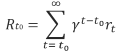

Where γ is the discount value and r_t is the reward at time t.
If we had an optimal policy π predicting which action to take in each state to maximize the return, then the process would have been simple. However, since we do not have such policy, we use neural networks to approximate it. We relate the state-action pairs to the rewards for the optimal policy π^* by using the Bellman equation:

Screenshot 2023-05-17 002610.png

Whereby π^* (s^' ) represents the optimal action a’ that we would take at state s’ if we had the optimal policy π^*

To find this optimal policy, we minimize the difference between the q-values obtained from the actions taken in the environment and the ‘target’ q-values. Our loss is therefore the mean square error between the two terms:

Screenshot 2023-05-17 002710.png

During training, we define the policy and target networks. The policy network is the one that computes the q-value at the current state: q(s,a). The target network is used to compute the target q-value (corresponding to the best action) at the next state: q^π (s^',π(s^' )). The network being updated to approximate the optimal policy is the policy network. The target network is a clone of the policy network. Its weights are fixed for a limited number of steps. We update the weights of the policy networks to minimize the difference between the policy and target q-values. We introduce the target network to improve the stability of the learning process.

To minimize the loss, we use Adam Optimizer which is an extended version of the gradient descent. Adam Optimizer will then update the weights of the network to find the optimal policy.

This process only occurs only after the memory has more transitions then the specified batch size required for training. Before that no learning is done. After this stage, the learning process discussed above is perfomed using a batch of state - action / reward - next state transitions and not a single transition.

2. Selecting an action:

At each time step, the selection of an action is done in two ways: via exploration or exploitation. Exploration refers to the selection of any random action at a given state. Exploitation refers to the selection of the action that would return a maximum q-value at a given state using the policy network. The way to determine whether the agent should go for exploration or exploitation is using the epsilon greedy strategy.  If a generated random number (between 0 and 1) is below epsilon, we choose exploration; otherwise, we choose exploitation. In the beginning, we choose epsilon ~ 1 to favor exploration as the agent has very little to no experience. Throughout the training the process we start decaying epsilon and making it closer to 0 to favor exploitation.

In [ ]:
class DQNAgent:
    """
    Class that defines the functions required for training the DQN agent
    """
    def __init__(self, device, state_size, action_size,
                    discount=0.99,
                    eps_max=1.0,
                    eps_min=0.01,
                    eps_decay=0.995,
                    memory_capacity=5000,
                    lr=1e-3,
                    train_mode=True):

        self.device = device

        # for epsilon-greedy exploration strategy
        self.epsilon = eps_max
        self.epsilon_min = eps_min
        self.epsilon_decay = eps_decay

        # for defining how far-sighted or myopic the agent should be
        self.discount = discount

        # size of the state vectors and number of possible actions
        self.state_size = state_size
        self.action_size = action_size

        # instances of the network for current policy and its target
        self.policy_net = DQNNet(self.state_size, self.action_size, lr).to(self.device)
        self.target_net = DQNNet(self.state_size, self.action_size, lr).to(self.device)
        self.target_net.eval() # since no learning is performed on the target net
        if not train_mode:
            self.policy_net.eval()

        # instance of the replay buffer
        self.memory = ReplayMemory(capacity=memory_capacity)


    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())


    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon*self.epsilon_decay)


    def select_action(self, state):
        """
        Uses epsilon-greedy exploration such that, if the randomly generated number is less than epsilon then the agent performs random action, else the agent executes the action suggested by the policy Q-network
        """
        """
        Function to return the appropriate action for the given state.
        During training, returns a randomly sampled action or a greedy action (predicted by the policy network), based on the epsilon value.
        During testing, returns action predicted by the policy network
        Parameters
        ---
        state: vector or tensor
            The current state of the environment as observed by the agent

        """

        if random.random() <= self.epsilon: # amount of exploration reduces with the epsilon value
            print('Exploration')
            return random.randrange(self.action_size)

        if not torch.is_tensor(state):
            state = torch.tensor([state], dtype=torch.float32).to(self.device)

        # pick the action with maximum Q-value as per the policy Q-network
        with torch.no_grad():
            print('Exploitation')
            action = self.policy_net.forward(state)
        return torch.argmax(action).item() # since actions are discrete, return index that has highest Q


    def learn(self, batchsize):

        # select n samples picked uniformly at random from the experience replay memory, such that n=batchsize
        if len(self.memory) < batchsize:
            return
        states, actions, next_states, rewards, dones = self.memory.sample(batchsize, self.device)

        # get q values of the actions that were taken, i.e calculate qpred;
        # actions vector has to be explicitly reshaped to nx1-vector
        # print(self.policy_net.forward(states).shape)
        # print(self.policy_net.forward(states))
        # print (actions.view(-1, 1))
        q_pred = self.policy_net.forward(states).gather(1, actions.view(-1, 1))

        #calculate target q-values, such that yj = rj + q(s', a'), but if current state is a terminal state, then yj = rj
        q_target = self.target_net.forward(next_states).max(dim=1).values # because max returns data structure with values and indices
        q_target[dones] = 0.0 # setting Q(s',a') to 0 when the current state is a terminal state
        y_j = rewards + (self.discount * q_target)
        y_j = y_j.view(-1, 1)

        # calculate the loss as the mean-squared error of yj and qpred
        self.policy_net.optimizer.zero_grad()
        loss = F.mse_loss(y_j, q_pred).mean()
        loss.backward()
        self.policy_net.optimizer.step()

    def save_model(self, filename):
        self.policy_net.save_model(filename)

    def load_model(self, filename):
        self.policy_net.load_model(filename=filename, device=self.device)

**Training:**

1. Filling the memory:

An initial step of the training process, we fill the memory with random transitions of random actions taken at given states.

In [ ]:
def fill_memory(env, dqn_agent, num_memory_fill_eps):
    """
    Function that performs a certain number of episodes of random interactions with the environment to populate the replay buffer

    """

    for _ in range(num_memory_fill_eps):
        done = False
        truncated = False
        state, info = env.reset()
        state.reshape(1,-1).squeeze()

        while not done:
            action = env.action_space.sample()
            next_state, reward, done, truncated, _ = env.step(action)
            next_state.reshape(1,-1).squeeze()
            dqn_agent.memory.store(state=state,
                                action=action,
                                next_state=next_state,
                                reward=reward,
                                done=done)


2. Training Loop:

In the training loop, steps are taken by the agent and stored in memory. The weights of the policy network are updated after each step as described above. In the training process, we keep track or the episode score and average score over the 100 last episode in order to keep track of the learning process.

In [ ]:
def train(env, dqn_agent, num_train_eps, num_memory_fill_eps, update_frequency, batchsize, results_basepath, render=False):
    """
    Function to train the agent
    Parameters
    ---
    env: gym.Env
        Instance of the environment used for training
    dqn_agent: DQNAgent
        Agent to be trained
    num_train_eps: int
        Number of episodes of training to be performed
    num_memory_fill_eps: int
        Number of episodes of random interaction to be performed
    update_frequency: int
        Number of steps after which the target models must be updated
    batchsize: int
        Number of transitions to be sampled from the replay buffer to perform a learning step
    results_basepath: str
        Location where models and other result files are saved
    render: bool
        Whether to create a pop-up window display the interaction of the agent with the environment

    Returns
    ---
    none
    """

    fill_memory(env, dqn_agent, num_memory_fill_eps)
    print('Memory filled. Current capacity: ', len(dqn_agent.memory))

    reward_history = []
    epsilon_history = []

    step_cnt = 0
    best_score = -np.inf

    for ep_cnt in range(num_train_eps):
        epsilon_history.append(dqn_agent.epsilon)

        done = False
        truncated = False
        state, info = env.reset()
        state.reshape(1,-1).squeeze()
        ep_score = 0

        while not done:
            if render:
                env.render()

            action = dqn_agent.select_action(state.reshape(1,-1).squeeze())
            next_state, reward, done, truncated, _ = env.step(action)
            next_state.reshape(1,-1).squeeze()
            dqn_agent.memory.store(state=state, action=action, next_state=next_state, reward=reward, done=done)

            dqn_agent.learn(batchsize=batchsize)

            if step_cnt % update_frequency == 0:
                dqn_agent.update_target_net()

            state = next_state
            ep_score += reward
            step_cnt += 1



        dqn_agent.update_epsilon()

        reward_history.append(ep_score)
        current_avg_score = np.mean(reward_history[-100:]) # moving average of last 100 episodes
        print('Ep: {}, Total Steps: {}, Ep: Score: {}, Avg score: {}; Epsilon: {}; Truncated: {}; Terminated: {}'.format(ep_cnt,step_cnt, ep_score, current_avg_score, epsilon_history[-1], truncated, done))


        if current_avg_score >= best_score:
            dqn_agent.save_model('{}/dqn_model'.format(results_basepath))
            best_score = current_avg_score

    with open('{}/train_reward_history.pkl'.format(results_basepath), 'wb') as f:
        pickle.dump(reward_history, f)

    with open('{}/train_epsilon_history.pkl'.format(results_basepath), 'wb') as f:
        pickle.dump(epsilon_history, f)

  3. Testing Loop

  After the training process is done, we use our model to predict the best action that need to be taken in each state. That being said we set the previously defined epsilon to 0 forcing the agent to always exploit the trained model and not opt for exploration.

In [ ]:
def test(env, dqn_agent, num_test_eps, seed, results_basepath, render=True):
    """
    Function to test the agent
    Parameters
    ---
    env: gym.Env
        Instance of the environment used for training
    dqn_agent: DQNAgent
        Agent to be trained
    num_test_eps: int
        Number of episodes of testing to be performed
    seed: int
        Value of the seed used for testing
    results_basepath: str
        Location where models and other result files are saved
    render: bool
        Whether to create a pop-up window display the interaction of the agent with the environment
    Returns
    ---
    none
    """

    step_cnt = 0
    reward_history = []

    for ep in range(num_test_eps):
        score = 0
        done = False
        truncated = False
        state, info = env.reset()
        state.reshape(1,-1).squeeze()
        while not done:

            if render:
                env.render()

            action = dqn_agent.select_action(state.reshape(1,-1).squeeze())
            next_state, reward, done, truncated, _ = env.step(action)
            next_state.reshape(1,-1).squeeze()

            score += reward
            state = next_state
            step_cnt += 1

        reward_history.append(score)
        print('Ep: {}, Score: {}'.format(ep, score))

    with open('{}/test_reward_history_{}.pkl'.format(results_basepath, seed), 'wb') as f:
        pickle.dump(reward_history, f)

4. Training the agent:

Training the agent is done in 2 rounds. Because of the 6 hours time-limit Google Colab has, we had to divide the training in 2. We continue the training from the dqn_model checkpoint found in the Results 1 folder.

In [ ]:
# Training round 1:
state_size = len(obs.reshape(-1,1))
action_size = len(env.get_available_actions())
agent = DQNAgent(device, state_size, action_size)
num_train_eps = 200
num_memory_fill_eps = 10
update_frequency = 100
batchsize = 64
results_basepath = '/content/drive/MyDrive/RL_autonomous_car/Results'

train(env, agent, num_train_eps, num_memory_fill_eps, update_frequency, batchsize, results_basepath, render=True)

In [ ]:
# Training round 2:
state_size = len(obs.reshape(-1,1))
action_size = env.action_space.n
num_train_eps = 100
num_memory_fill_eps = 10
update_frequency = 100
batchsize = 64
results_basepath = '/content/drive/MyDrive/RL_autonomous_car/Results2'

agent = DQNAgent(device,
                state_size,
                action_size,
                discount = 0.99,
                eps_max=0.36880183088056995,
                eps_min=0.01,
                eps_decay=0.995,
                train_mode=True)
agent.load_model('/content/drive/MyDrive/RL_autonomous_car/Results1/dqn_model')

train(env, agent, num_train_eps, num_memory_fill_eps, update_frequency, batchsize, results_basepath, render=True)

5. Testing the agent:

In this section, we use the test function that runs the simulations using the trained model.

In [ ]:
num_test_eps = 10
state_size = len(obs.reshape(-1,1))
action_size = len(env.get_available_actions())
seed = 1999
results_basepath = '/content/drive/MyDrive/RL_autonomous_car/Results2'

agent = DQNAgent(device,
                state_size,
                env.action_space.n,
                discount = 0.0,
                eps_max=0.0, # epsilon values should be zero to ensure no exploration in testing mode
                eps_min=0.0,
                eps_decay=0.0,
                train_mode=False)
agent.load_model('/content/drive/MyDrive/RL_autonomous_car/Results2/dqn_model')

test(env, agent, num_test_eps, seed, results_basepath, render=True)

# **Results**

**Training Results:**

Reward History: We plot the reward history in order to visualize the improvement of the decision making during the training process. This plot only includes the first 200 episodes. Epsilon (determining whether an action should be taken by exploration or exploitation) is still high. For this reason, we see really high fluctuations in the second half of the plot. The vehicle would still crash if an exploration action is taken at the right moment.

We note that we know that in proper Reinforcement Learning applications, one should wait until the reward converges in order to stop the training process.

However, in our case because of the lack of computational resources, we decided just to prove that learning is indeed occcuring and to show how the decision making is improving in our simulations.

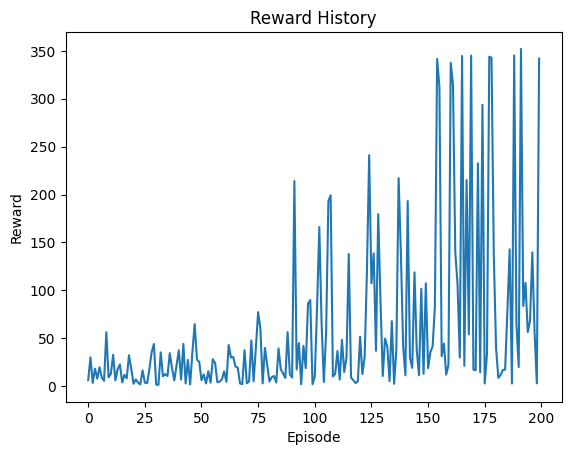

In [ ]:
import matplotlib.pyplot as plt
with open('/content/drive/MyDrive/RL_autonomous_car/Results1/train_reward_history.pkl', 'rb') as f:
    reward_history = pickle.load(f)

plt.plot(reward_history)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward History')
plt.show()

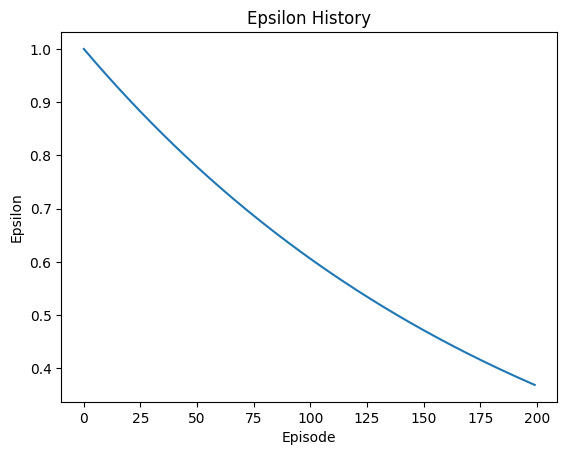

In [ ]:
with open('/content/drive/MyDrive/RL_autonomous_car/Results1/train_epsilon_history.pkl', 'rb') as f:
    epsilon_history = pickle.load(f)

plt.plot(epsilon_history)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon History')
plt.show()

**Testing Results:**

In this section, we display one example test video to visualize the improvement of the state-action decision making and plot the reward vs. episodes for all the testing episodes.

**Simulation:**
We notice that the agent is able now to slow down after recognizing nearby
vehicles and shift to the rightmost lanes while increasing its speed in order *to* maximize its rewards


In [ ]:
show_video('/content/drive/MyDrive/RL_autonomous_car/test_videos2/rl-video-episode-6.mp4')

**Rewards:** We notice that all episode rewards are really high varying between the small range [342, 246].

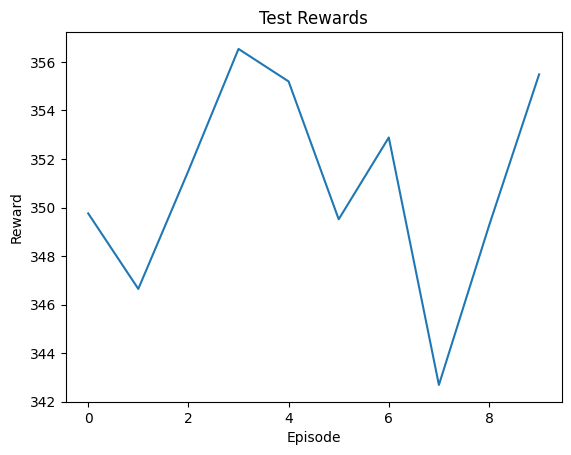

In [ ]:
import pickle
import matplotlib.pyplot as plt
with open('/content/drive/MyDrive/RL_autonomous_car/Results2/test_reward_history_1999.pkl', 'rb') as f:
    test_reward = pickle.load(f)

plt.plot(test_reward)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Test Rewards')
plt.show()

# **Conclusion**

We conclude that Deep Q-Networks are an efficient way of training an agent to take decisions inside a simplistic environment. In this project, we learned how to implement a DQN and trained an agent vehicle to make highway decisions based on the speed and position of its neighboring cars. Due to the time-constraints created by COLAB, we were forced to limit ourselves to minimum training time that proves that the code is properly working and that the agent is learning. The agent was able to escape other vehicles on the road and increase its speed when they were not around. However, further training would have allowed for the increase of the general speed. We note that extensions and modifications to the DQN can be applied in order to improve the learning process such as using:

- Double Q-learning which consists of using two sets of parameters: one for action selection (Q-network), and another for value estimation (target network).Instead of always selecting the action with the maximum Q-value, Double Q-Learning decouples the selection and evaluation, which helps in reducing action overestimation biases.

- Dueling Architecture: The dueling architecture separates the Q-network into two streams, one for estimating the state-value function and another for estimating the advantages of each action.This architecture improves learning efficiency and allows for better exploration.

- Prioritized Experience Replay: Instead of uniformly sampling experiences from the experience replay, prioritized experience replay assigns higher probability to experiences that have larger TD-errors (Temporal Difference errors). This technique focuses on challenging transitions and can lead to faster and more efficient learning.

However, in this project, we focused only on understanding how a basic DQN works, and on implementing it.


**Citations:**

    @misc{highway-env,
      author = {Leurent, Edouard},
      title = {An Environment for Autonomous Driving Decision-Making},
      year = {2018},
      publisher = {GitHub},
      journal = {GitHub repository},
      howpublished = {\url{https://github.com/eleurent/highway-env}},
    }